In [398]:
import numpy as np
np.set_printoptions(suppress=True)
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.rcParams["figure.figsize"] = (6, 4)
plt.style.use("ggplot")
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import mae
from tensorflow.keras import layers

In [384]:
df_train = pd.read_csv("Datasets\Anti_Anomaly_data/Anti_Anomaly_A1_df.csv")

In [385]:
df_train

,DATE_TIME,DATE,TIME,Time_of_Day,DC_POWER,AC_POWER,Conversion_Efficiency,Normalized_Power,DAILY_YIELD,DAILY_YIELD_diff,TOTAL_YIELD,TOTAL_YIELD_diff,Energy_Per_Irradiation,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 06:15:00,2020-05-15,06:15:00,2,278.000000,26.862500,0.096628,12476.658177,2.625000,2.625000,6259561.625,2.625,160.113205,24.011635,22.353459,0.022282
1,2020-05-15 06:30:00,2020-05-15,06:30:00,2,626.571429,60.685714,0.096854,12681.136011,13.285714,10.660714,6259572.286,10.661,392.987108,23.976731,22.893282,0.049410
2,2020-05-15 06:45:00,2020-05-15,06:45:00,2,1224.750000,119.275000,0.097387,12838.796741,34.875000,21.589286,6259593.875,21.589,469.481937,24.218990,24.442444,0.095394
3,2020-05-15 07:00:00,2020-05-15,07:00:00,2,1734.571429,170.014286,0.098015,12220.417157,72.714286,37.839286,6259631.714,37.839,812.937918,24.537398,27.185653,0.141940
4,2020-05-15 07:15:00,2020-05-15,07:15:00,2,1856.375000,181.937500,0.098007,11998.855242,116.250000,43.535714,6259675.250,43.536,3408.644527,24.815960,28.888478,0.154713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,2020-06-17 16:45:00,2020-06-17,16:45:00,3,1070.428571,104.042857,0.097197,14946.706583,5369.142857,33.642857,6485167.143,33.643,-715.600494,24.291896,26.972266,0.071616
1572,2020-06-17 17:00:00,2020-06-17,17:00:00,3,1218.375000,118.525000,0.097281,14089.717538,5395.000000,25.857143,6485193.000,25.857,1740.475519,24.191860,25.512402,0.086473
1573,2020-06-17 17:15:00,2020-06-17,17:15:00,3,1457.714286,141.928571,0.097364,13914.473750,5428.714286,33.714286,6485226.714,33.714,1843.321522,24.196167,26.664971,0.104762
1574,2020-06-17 17:30:00,2020-06-17,17:30:00,3,1260.600000,122.620000,0.097271,13986.189557,5456.000000,27.285714,6485254.000,27.286,-1864.985584,24.278404,26.862443,0.090132


In [386]:
tf.keras.utils.set_random_seed(1024)

In [627]:
cleaned_df = df_train.copy()
cleaned_df

,DATE_TIME,DATE,TIME,Time_of_Day,DC_POWER,AC_POWER,Conversion_Efficiency,Normalized_Power,DAILY_YIELD,DAILY_YIELD_diff,TOTAL_YIELD,TOTAL_YIELD_diff,Energy_Per_Irradiation,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 06:15:00,2020-05-15,06:15:00,2,278.000000,26.862500,0.096628,12476.658177,2.625000,2.625000,6259561.625,2.625,160.113205,24.011635,22.353459,0.022282
1,2020-05-15 06:30:00,2020-05-15,06:30:00,2,626.571429,60.685714,0.096854,12681.136011,13.285714,10.660714,6259572.286,10.661,392.987108,23.976731,22.893282,0.049410
2,2020-05-15 06:45:00,2020-05-15,06:45:00,2,1224.750000,119.275000,0.097387,12838.796741,34.875000,21.589286,6259593.875,21.589,469.481937,24.218990,24.442444,0.095394
3,2020-05-15 07:00:00,2020-05-15,07:00:00,2,1734.571429,170.014286,0.098015,12220.417157,72.714286,37.839286,6259631.714,37.839,812.937918,24.537398,27.185653,0.141940
4,2020-05-15 07:15:00,2020-05-15,07:15:00,2,1856.375000,181.937500,0.098007,11998.855242,116.250000,43.535714,6259675.250,43.536,3408.644527,24.815960,28.888478,0.154713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,2020-06-17 16:45:00,2020-06-17,16:45:00,3,1070.428571,104.042857,0.097197,14946.706583,5369.142857,33.642857,6485167.143,33.643,-715.600494,24.291896,26.972266,0.071616
1572,2020-06-17 17:00:00,2020-06-17,17:00:00,3,1218.375000,118.525000,0.097281,14089.717538,5395.000000,25.857143,6485193.000,25.857,1740.475519,24.191860,25.512402,0.086473
1573,2020-06-17 17:15:00,2020-06-17,17:15:00,3,1457.714286,141.928571,0.097364,13914.473750,5428.714286,33.714286,6485226.714,33.714,1843.321522,24.196167,26.664971,0.104762
1574,2020-06-17 17:30:00,2020-06-17,17:30:00,3,1260.600000,122.620000,0.097271,13986.189557,5456.000000,27.285714,6485254.000,27.286,-1864.985584,24.278404,26.862443,0.090132


In [628]:
cleaned_df = cleaned_df[["TOTAL_YIELD","Time_of_Day"]]

In [629]:
cleaned_df

,TOTAL_YIELD,Time_of_Day
0,6259561.625,2
1,6259572.286,2
2,6259593.875,2
3,6259631.714,2
4,6259675.250,2
...,...,...
1571,6485167.143,3
1572,6485193.000,3
1573,6485226.714,3
1574,6485254.000,3


In [630]:
df = cleaned_df.to_numpy().astype(np.float32)

In [631]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

In [633]:
class AutoEncoder(Model):
    def __init__(self, input_dim, latent_dim):
        super(AutoEncoder, self).__init__()
        self.input_dim = input_dim
        self.latent_dim = latent_dim

        self.encoder = tf.keras.Sequential([
            layers.Input(shape=(input_dim,)),
            layers.Reshape((input_dim, 1)),  # Reshape to 3D for Conv1D
            layers.Conv1D(128, 3, strides=1, activation='relu', padding="same"),
            layers.BatchNormalization(),
            layers.MaxPooling1D(2, padding="same"),
            layers.Conv1D(128, 3, strides=1, activation='relu', padding="same"),
            layers.BatchNormalization(),
            layers.MaxPooling1D(2, padding="same"),
            layers.Conv1D(latent_dim, 3, strides=1, activation='relu', padding="same"),
            layers.BatchNormalization(),
            layers.MaxPooling1D(2, padding="same"),
        ])
        # Previously, I was using UpSampling. I am trying Transposed Convolution this time around.
        self.decoder = tf.keras.Sequential([
            layers.Conv1DTranspose(latent_dim, 3, strides=1, activation='relu', padding="same"),
#             layers.UpSampling1D(2),
            layers.BatchNormalization(),
            layers.Conv1DTranspose(128, 3, strides=1, activation='relu', padding="same"),
#             layers.UpSampling1D(2),
            layers.BatchNormalization(),
            layers.Conv1DTranspose(128, 3, strides=1, activation='relu', padding="same"),
#             layers.UpSampling1D(2),
            layers.BatchNormalization(),
            layers.Flatten(),
            layers.Dense(input_dim)
        ])

    def call(self, X):
        encoded = self.encoder(X)
        decoded = self.decoder(encoded)
        return decoded


input_dim = df.shape[-1]
latent_dim = 32

model = AutoEncoder(input_dim, latent_dim)
model.build((None, input_dim))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss="mae")
model.summary()

Model: "auto_encoder_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_76 (Sequential)  (None, 1, 32)             63264     
                                                                 
 sequential_77 (Sequential)  (None, 2)                 66210     
                                                                 
Total params: 129474 (505.76 KB)
Trainable params: 128322 (501.26 KB)
Non-trainable params: 1152 (4.50 KB)
_________________________________________________________________


In [634]:
print(cleaned_df.shape)

(1576, 2)


In [635]:
epochs = 100
batch_size = 128
early_stopping = EarlyStopping(patience=10, min_delta=1e-3, monitor="val_loss", restore_best_weights=True)


history = model.fit(df, df, epochs=epochs, batch_size=batch_size,
                    validation_split=0.1, callbacks=[early_stopping])

Epoch 1/100
12/12 [==============================] - 4s 199ms/step - loss: 1.1005 - val_loss: 0.3638
Epoch 2/100
12/12 [==============================] - 0s 14ms/step - loss: 0.2618 - val_loss: 0.3333
Epoch 3/100
12/12 [==============================] - 0s 16ms/step - loss: 0.1051 - val_loss: 0.3230
Epoch 4/100
12/12 [==============================] - 0s 16ms/step - loss: 0.1171 - val_loss: 0.3217
Epoch 5/100
12/12 [==============================] - 0s 16ms/step - loss: 0.1198 - val_loss: 0.3649
Epoch 6/100
12/12 [==============================] - 0s 11ms/step - loss: 0.1108 - val_loss: 0.3221
Epoch 7/100
12/12 [==============================] - 0s 10ms/step - loss: 0.1475 - val_loss: 0.4081
Epoch 8/100
12/12 [==============================] - 0s 14ms/step - loss: 0.0931 - val_loss: 0.3784
Epoch 9/100
12/12 [==============================] - 0s 17ms/step - loss: 0.1264 - val_loss: 0.4072
Epoch 10/100
12/12 [==============================] - 0s 16ms/step - loss: 0.0894 - val_loss: 0.353

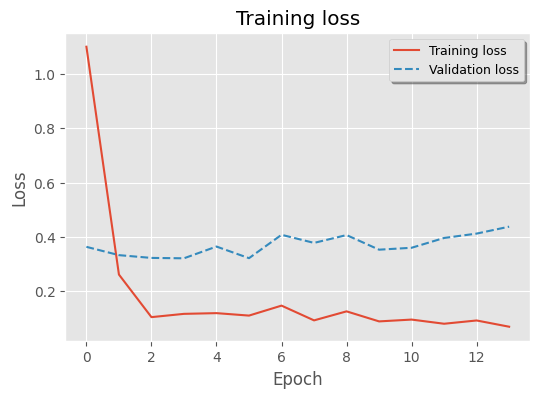

In [636]:
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label="Validation loss", ls="--")
plt.legend(shadow=True, frameon=True, facecolor="inherit", loc="best", fontsize=9)
plt.title("Training loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

In [637]:
# train_mae = model.evaluate(X_train, X_train, verbose=0)
test_mae = model.evaluate(df, df, verbose=0)
print("Testing dataset mae: ", test_mae)


Testing dataset mae:  0.23867376148700714


50/50 [==============================] - 0s 3ms/step


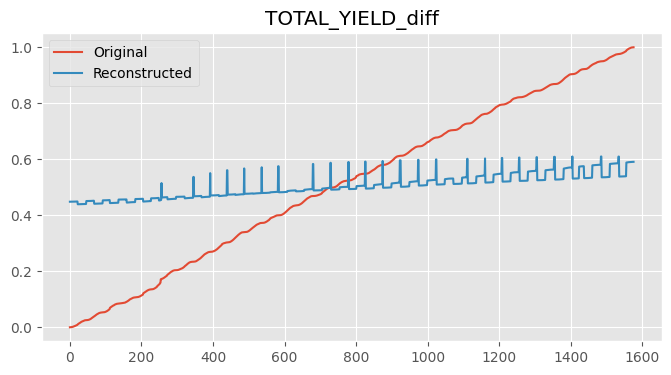

In [638]:
import matplotlib.pyplot as plt

reconstructed = model.predict(df)
for i in range(1):  # Plot for each feature
    plt.figure(figsize=(8, 4))
    plt.plot(df[:, i], label="Original")
    plt.plot(reconstructed[:, i], label="Reconstructed")
    plt.title(f"TOTAL_YIELD_diff")
    plt.legend()
    plt.show()


In [577]:
reconstruction_errors = np.mean(np.abs(df - reconstructed), axis=1)

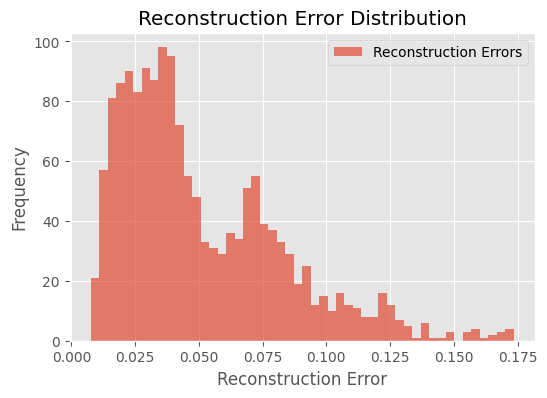

In [578]:
import matplotlib.pyplot as plt

plt.hist(reconstruction_errors, bins=50, alpha=0.7, label="Reconstruction Errors")
plt.title("Reconstruction Error Distribution")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [593]:
# List of DataFrame names for location_A
df_names_A = [
    "A1_df", "A2_df", "A3_df", "A5_df", "A12_df", "A19_df", "A20_df", 
    "A23_df", "A24_df", "A25_df", "A26_df", "A27_df", "A28_df", 
    "A32_df", "A34_df", "A36_df", "A37_df", "A39_df", "A42_df", 
    "A43_df", "A44_df", "A45_df"
]

# Dictionary to store the imported DataFrames
location_A = {}

# Load each CSV file into a DataFrame
for df_name in df_names_A:
    csv_filename = f"Datasets\sensor_wise_data\{df_name}.csv"
    location_A[df_name] = pd.read_csv(csv_filename)

In [594]:
A1_df = location_A["A1_df"]

In [595]:
test = A1_df.copy()
test = test[["TOTAL_YIELD","Time_of_Day","IRRADIATION"]]
test = test.to_numpy().astype(np.float32)
test = scaler.fit_transform(test)

In [596]:
reconstructed = model.predict(test)

99/99 [==============================] - 0s 3ms/step


In [597]:
reconstruction_errors = np.mean(np.abs(test - reconstructed), axis=1)

In [598]:
threshold = 0.2  # Slightly above testing MAE

In [599]:
anomalies = reconstruction_errors > threshold
anomaly_indexes = np.where(anomalies)[0]  # Returns an array of anomaly indexes

In [600]:
# Copy the original DataFrame to avoid overwriting
A1_df['Is_Anomaly'] = False  # Initialize all as False

# Mark anomalies
A1_df.loc[anomaly_indexes, 'Is_Anomaly'] = True

In [604]:
A1_df[A1_df['Is_Anomaly']].head(60)

,DATE_TIME,DATE,TIME,Time_of_Day,DC_POWER,AC_POWER,Conversion_Efficiency,Normalized_Power,DAILY_YIELD,DAILY_YIELD_diff,TOTAL_YIELD,TOTAL_YIELD_diff,Energy_Per_Irradiation,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,Is_Anomaly
27,2020-05-15 06:45:00,2020-05-15,06:45:00,2,1224.750000,119.275000,0.097387,12838.796741,34.875000,21.589286,6259593.875,21.589,469.481937,24.218990,24.442444,0.095394,True
28,2020-05-15 07:00:00,2020-05-15,07:00:00,2,1734.571429,170.014286,0.098015,12220.417157,72.714286,37.839286,6259631.714,37.839,812.937918,24.537398,27.185653,0.141940,True
29,2020-05-15 07:15:00,2020-05-15,07:15:00,2,1856.375000,181.937500,0.098007,11998.855242,116.250000,43.535714,6259675.250,43.536,3408.644527,24.815960,28.888478,0.154713,True
30,2020-05-15 07:30:00,2020-05-15,07:30:00,2,1842.285714,180.585714,0.098023,12381.022827,162.428571,46.178571,6259721.429,46.179,-7809.051361,24.988790,29.605644,0.148799,True
31,2020-05-15 07:45:00,2020-05-15,07:45:00,2,1877.875000,184.062500,0.098016,12969.339448,206.375000,43.946429,6259765.375,43.946,-10970.772301,25.216180,29.547111,0.144793,True
32,2020-05-15 08:00:00,2020-05-15,08:00:00,2,3246.000000,318.671429,0.098174,16098.106496,263.571429,57.196429,6259822.571,57.196,1006.171103,25.419513,31.412545,0.201639,True
33,2020-05-15 08:15:00,2020-05-15,08:15:00,2,3917.500000,384.837500,0.098235,11331.828967,359.875000,96.303571,6259918.875,96.304,668.457327,25.959082,35.528711,0.345708,True
35,2020-05-15 08:45:00,2020-05-15,08:45:00,2,4257.125000,417.787500,0.098138,13625.991956,556.125000,92.125000,6260115.125,92.125,-991.425290,26.831830,39.081954,0.312427,True
37,2020-05-15 09:15:00,2020-05-15,09:15:00,2,4015.500000,394.012500,0.098123,11643.043992,811.625000,122.767857,6260370.625,122.768,-441.185223,27.988362,46.617706,0.344884,True
38,2020-05-15 09:30:00,2020-05-15,09:30:00,2,3219.285714,315.885714,0.098123,12915.973439,886.571429,74.946429,6260445.571,74.946,-783.661858,27.516728,39.136326,0.249248,True


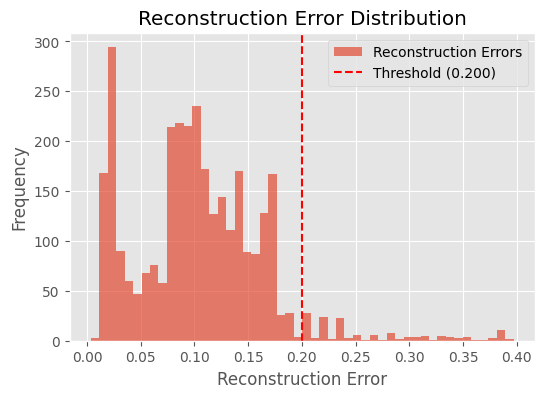

In [602]:
import matplotlib.pyplot as plt

plt.hist(reconstruction_errors, bins=50, alpha=0.7, label="Reconstruction Errors")
plt.axvline(threshold, color='r', linestyle='--', label=f"Threshold ({threshold:.3f})")
plt.title("Reconstruction Error Distribution")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.legend()
plt.show()


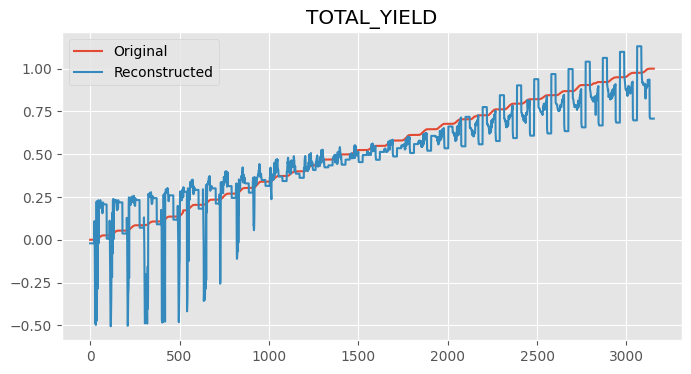

In [603]:
for i in range(1):  # Plot for each feature
    plt.figure(figsize=(8, 4))
    plt.plot(test[:, i], label="Original")
    plt.plot(reconstructed[:, i], label="Reconstructed")
    plt.title(f"TOTAL_YIELD")
    plt.legend()
    plt.show()